## Discription ###
   ##This code is for Course End Assessment for the Course3 Data Science with Python##
## ComCast project ##

In [1]:
##Importing Libraries
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [2]:
##Opening dataset
comcast_data=pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast_data.head(9)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No


In [3]:
#Checking format of date column in the Dataset
type(comcast_data.Date[6])


str

In [4]:
##Data Preprocessing: changing date into datetime format
#comcast_data.Date=pd.to_datetime(comcast_data.Date,format='%d/%m/%Y')
#ValueError: time data '22-04-15' does not match format '%m/%d/%Y' (match)
#Since above code is giving errors, even without defining format it is returning wrong data in table so we worked on date-month-year column
comcast_data.Date_month_year=pd.to_datetime(comcast_data.Date_month_year)
comcast_data.head(5)



,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
#Daily Complaints Trend
daily_complaints_data=pd.DataFrame(comcast_data.groupby(['Date_month_year']).agg({'Date_month_year':'count'}))
daily_complaints_data.columns=['No. of Complaints']
print(sum(daily_complaints_data['No. of Complaints']))
daily_complaints_data



2224


,No. of Complaints
Date_month_year,
2015-01-04,18
2015-01-05,12
2015-01-06,25
2015-02-04,27
2015-02-05,7
...,...
2015-11-05,12
2015-11-06,21
2015-12-04,15


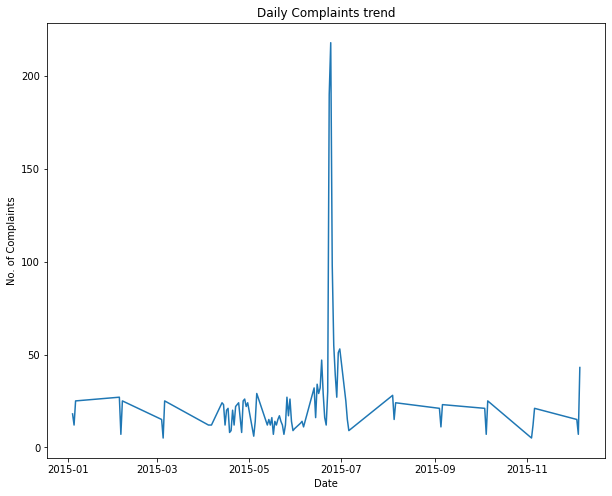

In [6]:
##Complaint Trend with Daily Granularity

plt.figure(figsize=(10,8))
plt.plot(daily_complaints_data['No. of Complaints'])
plt.xlabel('Date')
plt.ylabel('No. of Complaints')
plt.title('Daily Complaints trend')
plt.savefig('Daily1.png', dpi=100)
plt.show()

In [7]:
#Extracting Months

comcast_data['month']=pd.DatetimeIndex(comcast_data['Date_month_year']).month
comcast_data.head(10)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6


In [8]:
# Monthly complaints

monthly_complaints_data=pd.DataFrame(comcast_data.groupby(comcast_data.month).agg({'month':'count'}))
monthly_complaints_data.columns=['No. of Complaints']
monthly_complaints_data

,No. of Complaints
month,
1,55
2,59
3,45
4,375
5,317
6,1046
7,49
8,67
9,55


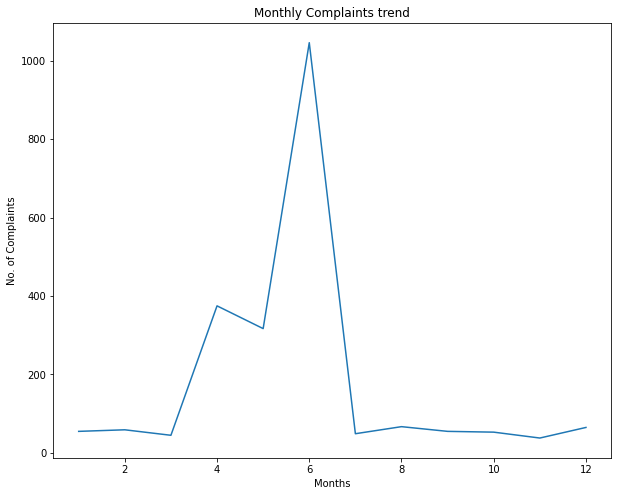

In [9]:
##Complaint Trend with Monthly Granularity

plt.figure(figsize=(10,8))
plt.plot(monthly_complaints_data['No. of Complaints'])
plt.xlabel('Months')
plt.ylabel('No. of Complaints')
plt.title('Monthly Complaints trend')
plt.savefig('Monthly2.png', dpi=100)
plt.show()

In [14]:
# Complaint Types Frequency Table

complaint_freqtable=comcast_data['Customer Complaint'].value_counts()
complaint_freqtable=pd.DataFrame(complaint_freqtable).reset_index()
complaint_freqtable.columns=['Complaint Type','Frequency']
complaint_freqtable.head(20)


,Complaint Type,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
5,Comcast Billing,11
6,Comcast Data Caps,11
7,Unfair Billing Practices,9
8,Comcast data caps,8
9,Comcast data cap,8


In [11]:
## Briefing status into new column with only two categorical value Open and CLosed

comcast_data['Complaint_Status']=['Open' if Status == 'Open' or Status == 'Pending'
                              else 'Closed' for Status in comcast_data.Status]
comcast_data


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,Closed
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,Closed


In [12]:
##Stacked Bar Chart for Status of complaints
#Grouping statewise

state_wise=comcast_data.groupby(['State','Complaint_Status']).size()
state_wise=state_wise.unstack().fillna(0)
state_wise

Complaint_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


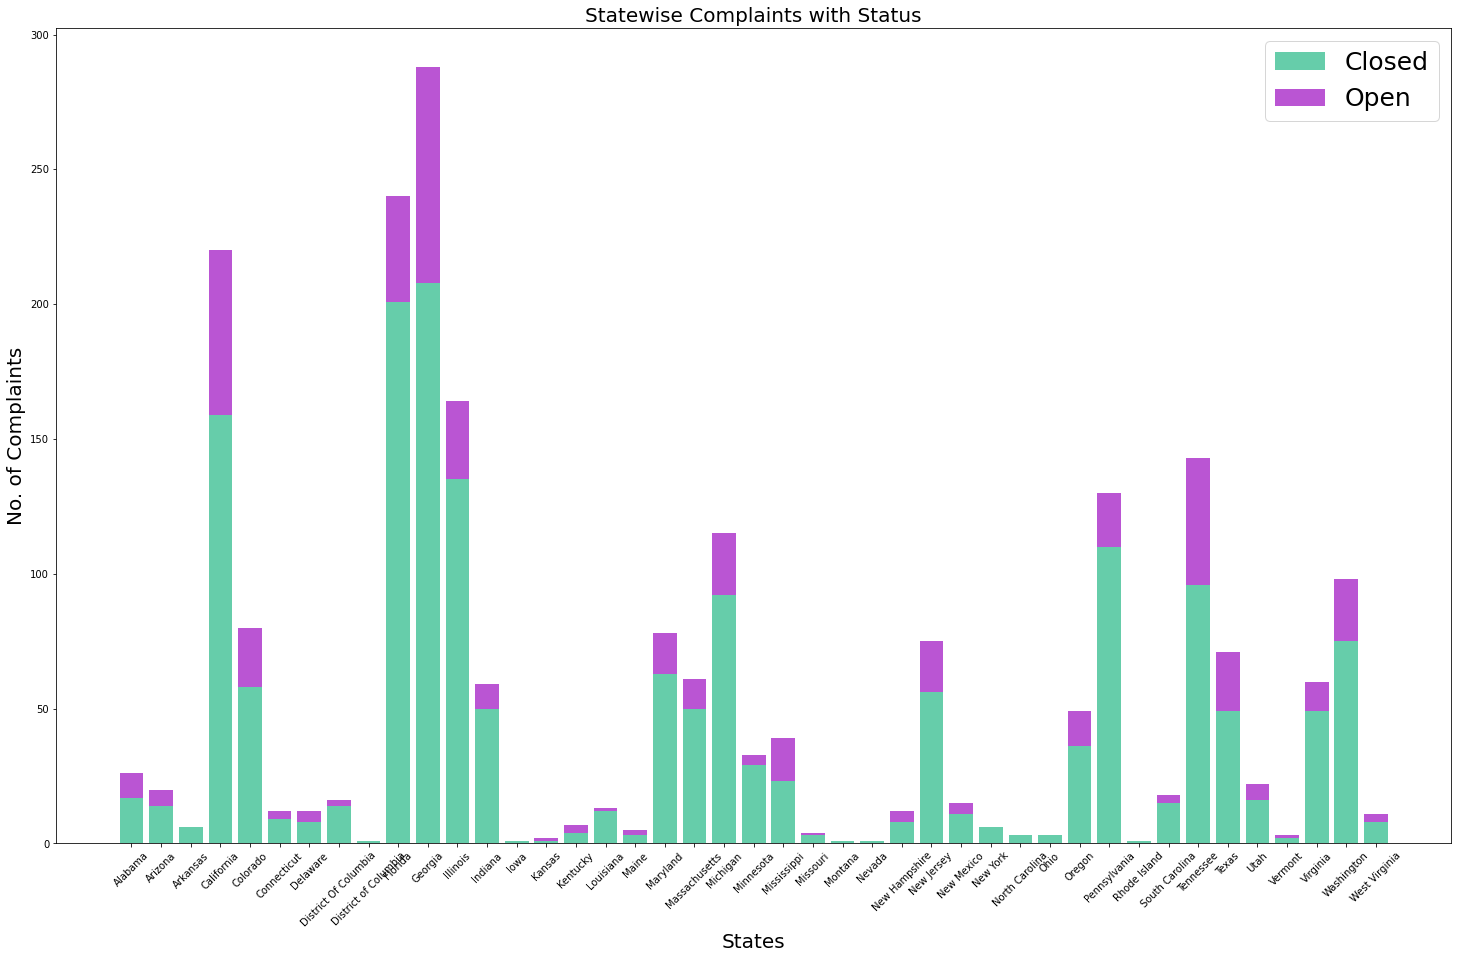

In [21]:
## Stacked bar chart for statewise complaints showing closed and open status proportions 

plt.figure(figsize=(25,15))
plt.bar(state_wise.index,state_wise.Closed,label='Closed',color='#66CDAA')
plt.bar(state_wise.index,state_wise.Open,bottom=state_wise.Closed,label='Open',color='#BA55D3')
plt.xticks(rotation=45)
plt.legend(prop={'size': 25})
plt.title('Statewise Complaints with Status',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.ylabel('No. of Complaints',fontsize=20)
plt.savefig('Stacked2.png', dpi=100)
plt.show()

In [77]:
# Maximum Complaints recieved and corresponding state

state_wise['Total complaints']=state_wise['Open']+state_wise['Closed']
state_with_highest_complaints=state_wise['Total complaints'].idxmax()
maximum_complaints=int(state_wise['Total complaints'].max())
print('State with highest number of complaints ',state_with_highest_complaints, 'with total number of complaints ',maximum_complaints)

## Statewise unsolved complaints percentage

state_wise['Unsolved_percentage']=(state_wise['Open'].div(state_wise['Total complaints']))*100
state_with_highest_unsolved_rate=state_wise['Unsolved_percentage'].idxmax()
highest_unsolved_rate=state_wise['Unsolved_percentage'].max()
print('State with highest unsolved rate is ',state_with_highest_unsolved_rate, 'with unsolved rate of ',highest_unsolved_rate, '%.')
state_wise

State with highest unsolved rate is  Kansas with unsolved rate of  50.0 %.


Complaint_Status,Closed,Open,Total complaints,Unsolved_percentage
State,,,,
Alabama,17.0,9.0,26.0,34.615385
Arizona,14.0,6.0,20.0,30.000000
Arkansas,6.0,0.0,6.0,0.000000
California,159.0,61.0,220.0,27.727273
Colorado,58.0,22.0,80.0,27.500000
Connecticut,9.0,3.0,12.0,25.000000
Delaware,8.0,4.0,12.0,33.333333
District Of Columbia,14.0,2.0,16.0,12.500000
District of Columbia,1.0,0.0,1.0,0.000000


In [79]:
print('State with highest number of complaints ',state_with_highest_complaints, 'with total number of complaints ',maximum_complaints)

State with highest number of complaints  Georgia with total number of complaints  288


In [82]:
# Grouping complaints for received via internet or customer calls

state_receivedvia=comcast_data.groupby(['Received Via','Complaint_Status']).size()
state_receivedvia=state_receivedvia.unstack().fillna(0)

# Resolved percentage for complaints received via internet or customer calls
state_receivedvia['Total_complaints']=state_receivedvia['Open']+state_receivedvia['Closed']
state_receivedvia['Resolved_percentage']=(state_receivedvia['Closed'].div(state_receivedvia['Total_complaints']))*100

state_receivedvia.head(5)

Complaint_Status,Closed,Open,Total_complaints,Resolved_percentage
Received Via,,,,
Customer Care Call,864,255,1119,77.211796
Internet,843,262,1105,76.289593


In [29]:
########################################################################################
#Some extra tasks
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#fig.set_size_inches(18.5, 10.5, forward=True)

#comcast_data['complaint type']=pd.DataFrame(comcast_data['CustComplaintType'])
#complaints_types=pd.DataFrame(comcast_data.groupby('Customer Complaint').agg(len))
#complaints_types
#len(comcast_data['Customer Complaint'])


,Ticket #,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
Customer Complaint,,,,,,,,,,,
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!,1,1,1,1,1,1,1,1,1,1,1
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls,1,1,1,1,1,1,1,1,1,1,1
2 months and Comcast has not fixed problem,1,1,1,1,1,1,1,1,1,1,1
2+ Day Degraded Services,1,1,1,1,1,1,1,1,1,1,1
300 GB monthly allowance,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
why am I paying for this ?,1,1,1,1,1,1,1,1,1,1,1
without service despite willingness to pay,1,1,1,1,1,1,1,1,1,1,1
xfinitty tv and exfinity alarm,1,1,1,1,1,1,1,1,1,1,1
